In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

#URL = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv?where=Landkreis%20%3D%20%27SK%20Dresden%27"
#URL = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv?where=Landkreis%20%3D%20%27LK%20Bautzen%27"
URL = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv"

docs = pd.read_csv( URL, parse_dates=["Meldedatum"])

In [2]:
docs.columns

Index(['ObjectId', 'IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe',
       'Geschlecht', 'AnzahlFall', 'AnzahlTodesfall', 'Meldedatum',
       'IdLandkreis', 'Datenstand', 'NeuerFall', 'NeuerTodesfall', 'Refdatum',
       'NeuGenesen', 'AnzahlGenesen', 'IstErkrankungsbeginn', 'Altersgruppe2'],
      dtype='object')

<AxesSubplot:title={'center':'Änderung des wöchentlichen Durchschnitts pro Tag in Prozenz'}, xlabel='Meldedatum', ylabel='Altersgruppe'>

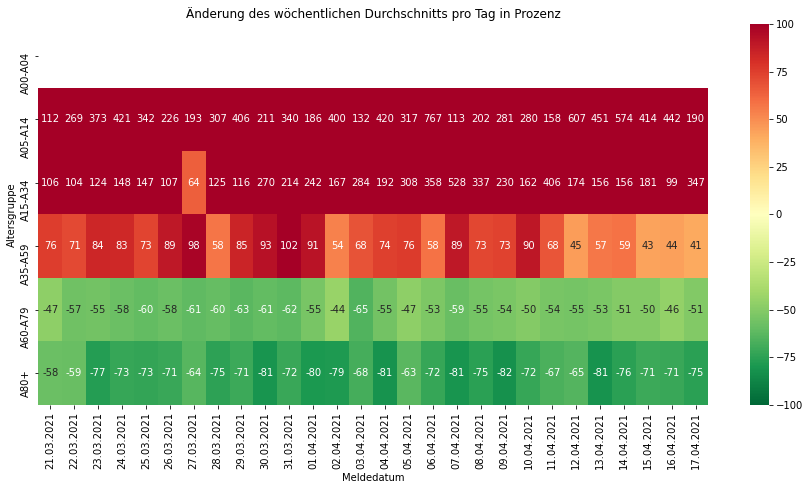

In [3]:
ldocs = docs[ docs["Bundesland"] == "Sachsen" ]
w = ldocs.pivot_table(index='Altersgruppe', columns='Meldedatum', values='AnzahlFall', aggfunc=np.sum).fillna(0)
#w = w.rolling(7,axis=1).mean()
w = w.loc[ w.index != "unbekannt" ] 
w = w[ w.columns[-30:-2] ]
w = w.pct_change() * 100
#w = w.pct_change(axis='columns')
#w = w.diff(1,axis=0)
xticklabels = [ X.strftime("%d.%m.%Y") for X in w.columns ]
fig, ax = plt.subplots(1, 1, figsize=(15, 7), sharex=True, facecolor='white')
ax.set_title('Änderung des wöchentlichen Durchschnitts pro Tag in Prozenz')
sns.heatmap(w,cmap=cm.RdYlGn.reversed(), xticklabels=xticklabels, vmax=100, vmin=-100,fmt=".0f", annot=True)
#plt.savefig("" + "dd_ag.png", dpi=100, facecolor='white', transparent=False)

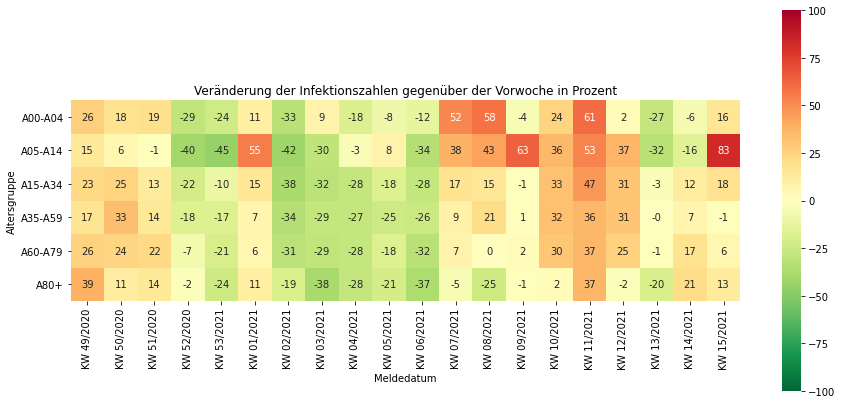

In [5]:
#ldocs = docs[ docs["Landkreis"] == "SK Dresden" ]
ldocs = docs[ docs["Bundesland"] == "Sachsen" ]
weekly = ldocs.set_index("Meldedatum").groupby("Altersgruppe").resample("W").agg({"AnzahlFall":"sum"}).fillna(0)
weekly_pct = weekly.pct_change() * 100
weekly_pcts = weekly_pct.reset_index().pivot(index='Altersgruppe', columns='Meldedatum', values='AnzahlFall')
weekly_pcts = weekly_pcts.loc[ weekly_pcts.index != "unbekannt" ] 
cols = [ X for X in weekly_pcts.columns if X != max(weekly_pcts.columns) ]
weekly_pcts = weekly_pcts[ cols[-20:] ]
xticklabels = [ "KW "+X.strftime("%V/%Y") for X in weekly_pcts.columns ]
fig, ax = plt.subplots(1, 1, figsize=(15, 7), sharex=True, facecolor='white')
ax.set_title('Veränderung der Infektionszahlen gegenüber der Vorwoche in Prozent')
sns.heatmap(weekly_pcts,cmap=cm.RdYlGn.reversed(), xticklabels=xticklabels, vmax=100, vmin=-100, annot=True, fmt=".0f", square=True)
plt.savefig("" + "dd_ag.png", dpi=100, facecolor='white', transparent=False)